In [388]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Descripción base de datos

Este problema consite en determinar el rendimiento relativo de una CPU a partir de sus características.

Donde se tienen la siguientes características:
- Vendor Name → Nombre del vendedor de la CPU
- Model Name → Modelo de la CPU
- MYCT →  Tiempo del cliclo de la máquina en nanosegundos
- MMIN → Memoria principal minima de la CPU en Kilobytes
- MMAX → Memoria principal máxima de la CPU en Kilobytes
- CACH → Memoria Cache de la CPU en Kilobytes
- CHMIN → Canales mínimos de la CPU en unidades
- CHMAX → Canales máximos de la CPU en unidades
- PRP → Rendimiento relativo publicado


##### 1.- Lectura del conjunto de datos.

In [389]:
df = pd.read_csv("machine.data",header=None,usecols=[i for i in range(9)],names=["vendor name","Model Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"])
df

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,sratus,32,125,2000,8000,0,2,14,52
207,wang,vs-100,480,512,8000,32,0,0,67


#### 2.- Variable de predicción -> PRP que es el rendimiento relativo publicado

#### 3.- Análisis para determinar que atributos del conjunto utilizar para realizar el modelamiento del problema.

In [390]:
df.dtypes

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
dtype: object

In [391]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [392]:
df.corr(numeric_only=True)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


<Axes: xlabel='MMAX', ylabel='PRP'>

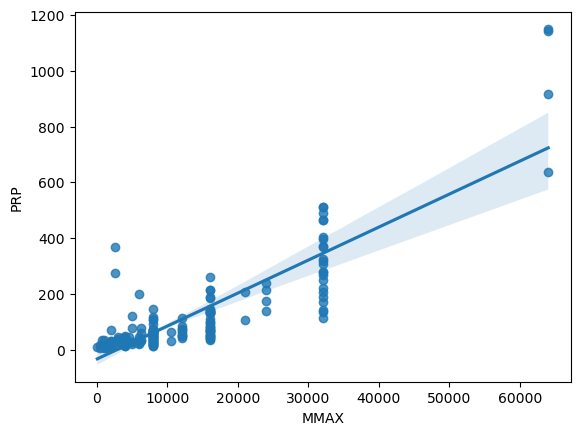

In [393]:
sns.regplot(x="MMAX", y="PRP", data=df)

<Axes: xlabel='MMIN', ylabel='PRP'>

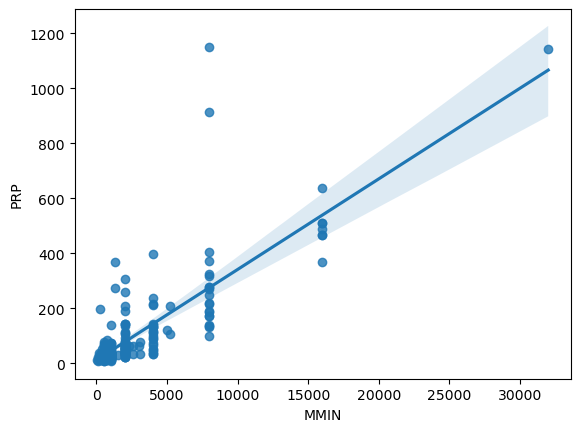

In [394]:
sns.regplot(x="MMIN", y="PRP", data=df)

<Axes: xlabel='MYCT', ylabel='PRP'>

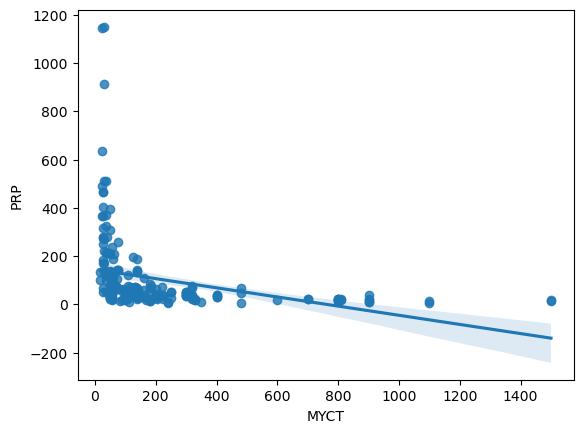

In [395]:
sns.regplot(x="MYCT", y="PRP", data=df)

### Atributo categorico de Vendedor vs performance

<Axes: xlabel='vendor name', ylabel='PRP'>

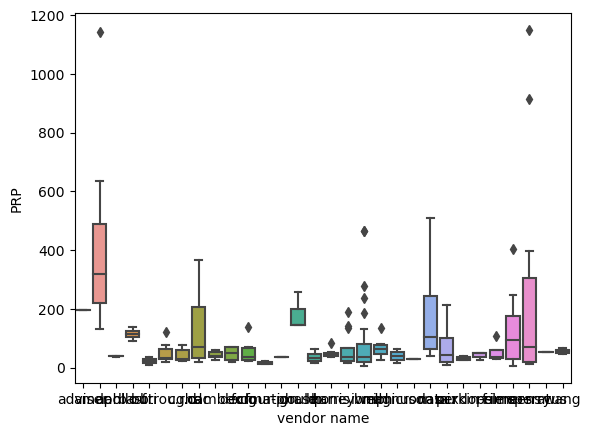

In [396]:
sns.boxplot(x="vendor name", y="PRP", data=df)

A partir de la grafica se puede observar que los precios entre los diferentes vendedores tienen muchas superposiciones dado tambien el numero de vendedores que se cuenta que son 30, por lo que se podria concluir que el atributo categorico del vendedor no es un buen predictor para la performance

## Maximum channels in units versus published relative performance

In [397]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CHMAX'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6052092928126738  con un valor de P = 2.847764506453752e-22


## Minimum channels in units versus published relative performance

In [398]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CHMIN'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6089032834114068  con un valor de P = 1.3573247959670746e-22


## Cache memory in kilobytes time versus published relative performance

In [399]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CACH'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6626414266783185  con un valor de P = 8.505256503662234e-28


## Machine cycle time in nanoseconds versus published relative performance

In [400]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MYCT'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.30709944709571235  con un valor de P = 6.101790154081601e-06


## Maximum main memory in kilobytes versus published relative performance

In [401]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MMAX'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.863004124365134  con un valor de P = 2.648888997750177e-63


## Minimum main memory in kilobytes versus published relative performance

In [402]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MMIN'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.7949313405266907  con un valor de P = 8.268502737494438e-47


## Linear Model (MMIN vs PRP)

In [403]:
lm = LinearRegression()

In [404]:
X = df[['MMIN']]
Y = df['PRP']

In [405]:
lm.fit(X,Y)

LinearRegression()

In [406]:
Y_hat=lm.predict(X)
Y_hat[0:5]

array([ 19.52706044, 274.78133736, 274.78133736, 274.78133736,
       274.78133736])

In [407]:
lm.intercept_

11.088902523805857

In [408]:
lm.coef_

array([0.03296155])

(0.0, 1286.2809345586857)

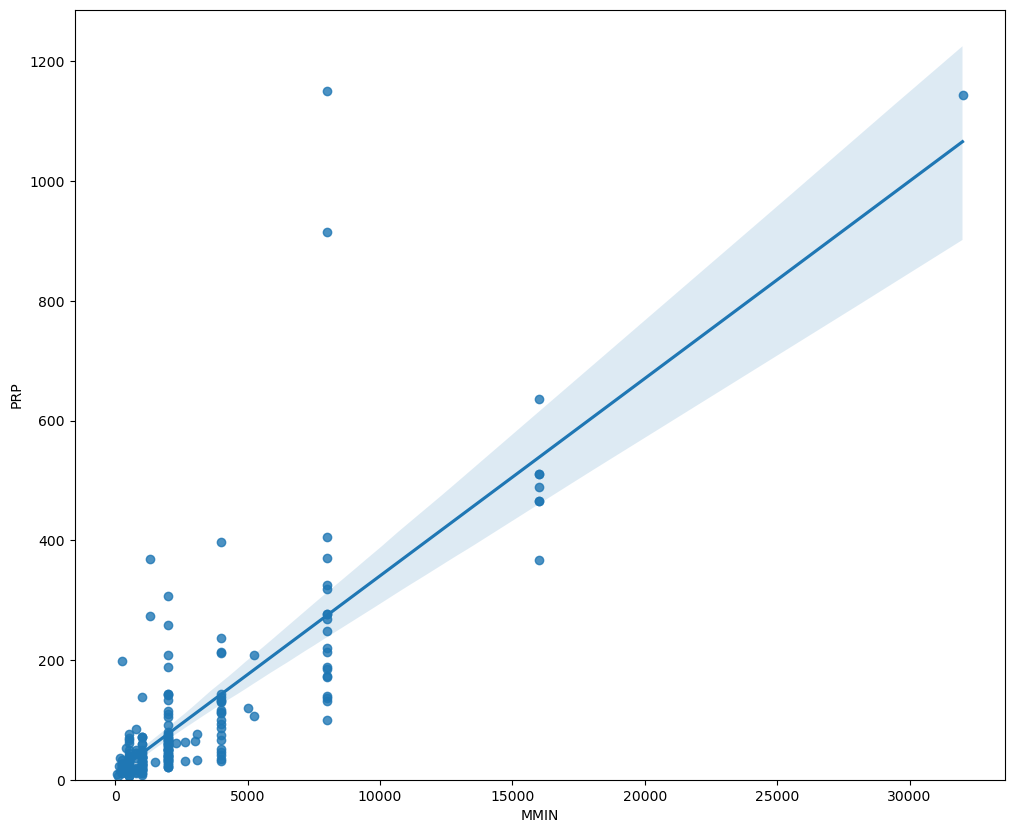

In [409]:
ancho = 12
alto = 10
plt.figure(figsize=(ancho, alto))
sns.regplot(x="MMIN", y="PRP", data=df)
plt.ylim(0,)

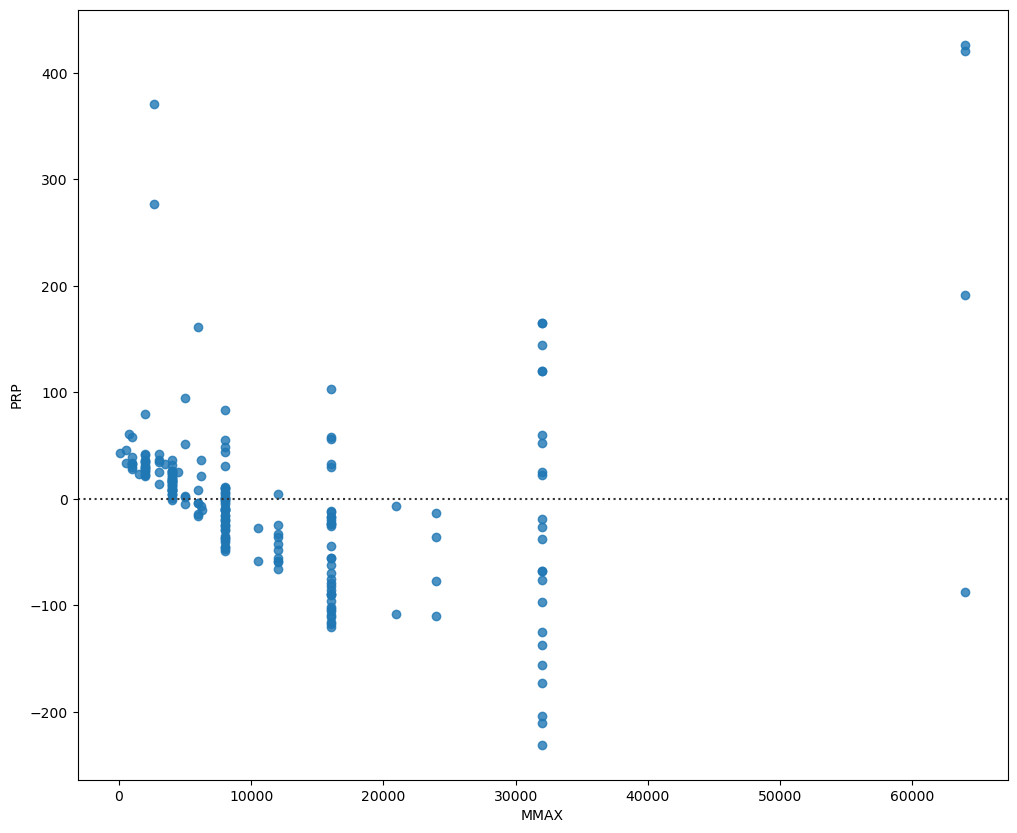

In [410]:
ancho = 12
alto = 10
plt.figure(figsize=(ancho, alto))
sns.residplot(x=df['MMAX'], y=df['PRP'])
plt.show()

* ¿Qué nos dice este gráfico?

Este grafico nos muestra que los residuos no estan distribuido aleatoriamente, en el eje x, Por lo que quizas podriamos utilizar otro modelo.

## Linear Model (MMAX vs PRP)

In [411]:
X = df[['MMAX']]
Y = df['PRP']

In [412]:
lm.fit(X,Y)

LinearRegression()

In [413]:
Y_hat=lm.predict(X)
Y_hat[0:5]

array([ 37.01776763, 344.75813552, 344.75813552, 344.75813552,
       155.37944759])

In [414]:
lm.intercept_

-33.999240343042814

In [415]:
lm.coef_

array([0.01183617])

(0.0, 1210.3134791761775)

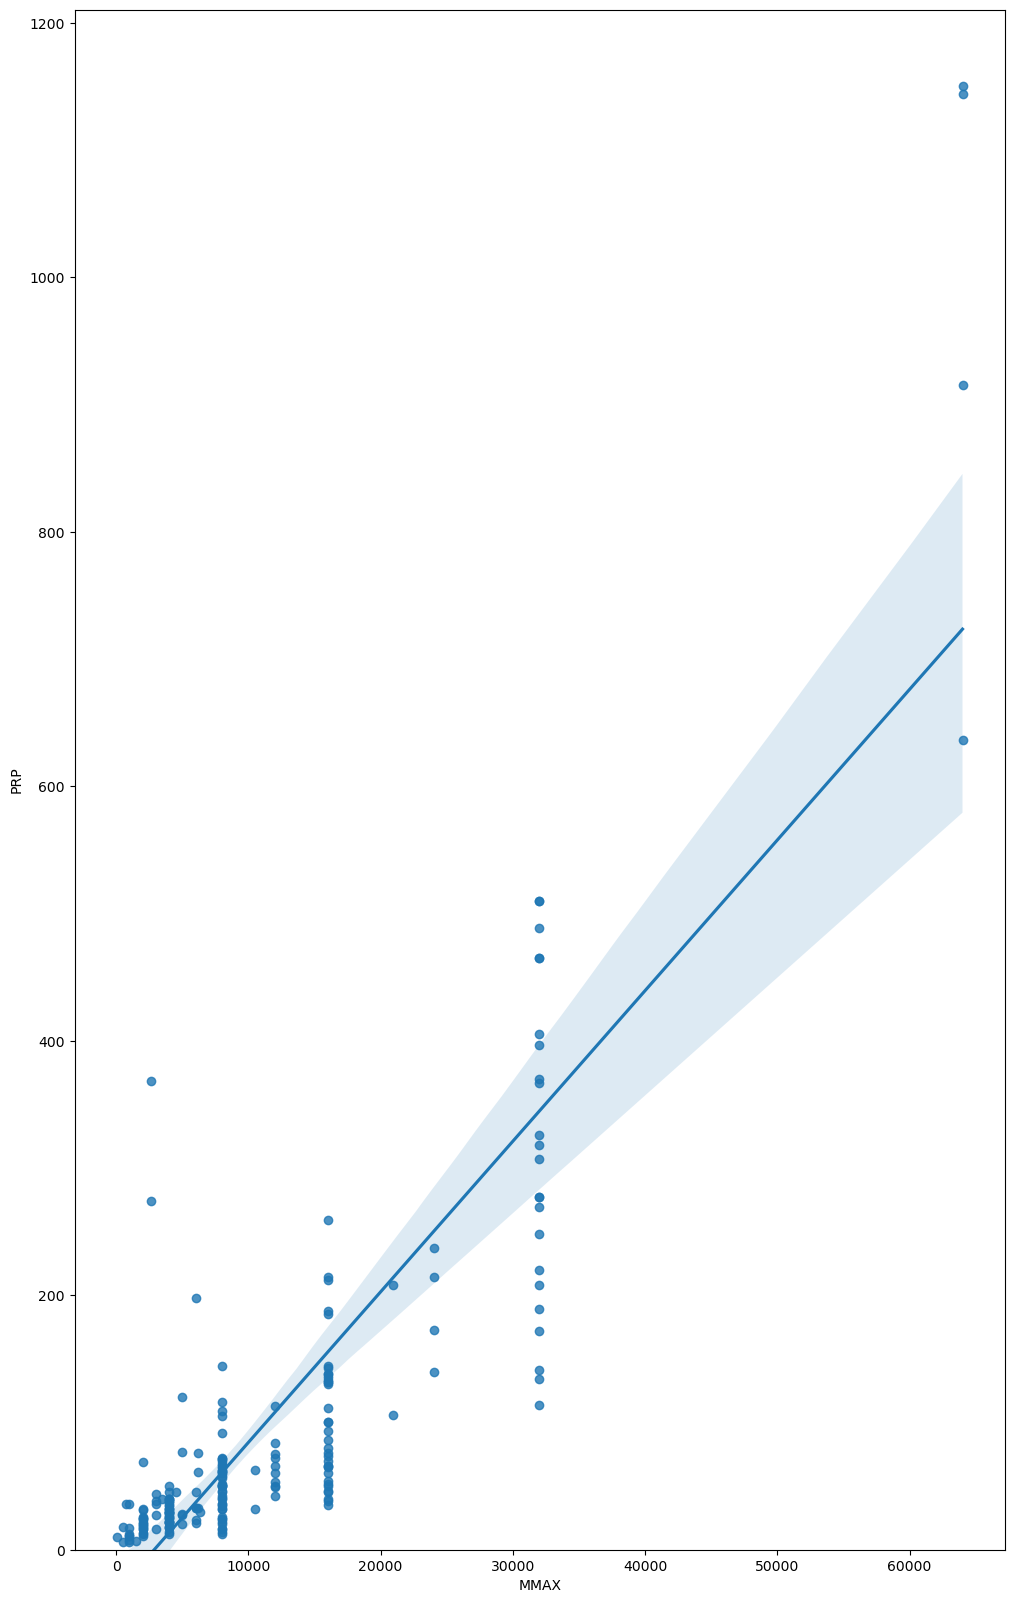

In [416]:
ancho = 12
alto = 20
plt.figure(figsize=(ancho, alto))
sns.regplot(x="MMAX", y="PRP", data=df)
plt.ylim(0,)

## Multiple Linear Model

In [417]:
Z = df[['MMIN', 'MMAX']]

In [418]:
lm.fit(Z, df['PRP'])

LinearRegression()

In [419]:
lm.intercept_

-32.76260716218992

In [420]:
lm.coef_

array([0.01371486, 0.00839686])

In [421]:
Y_hat = lm.predict(Z)

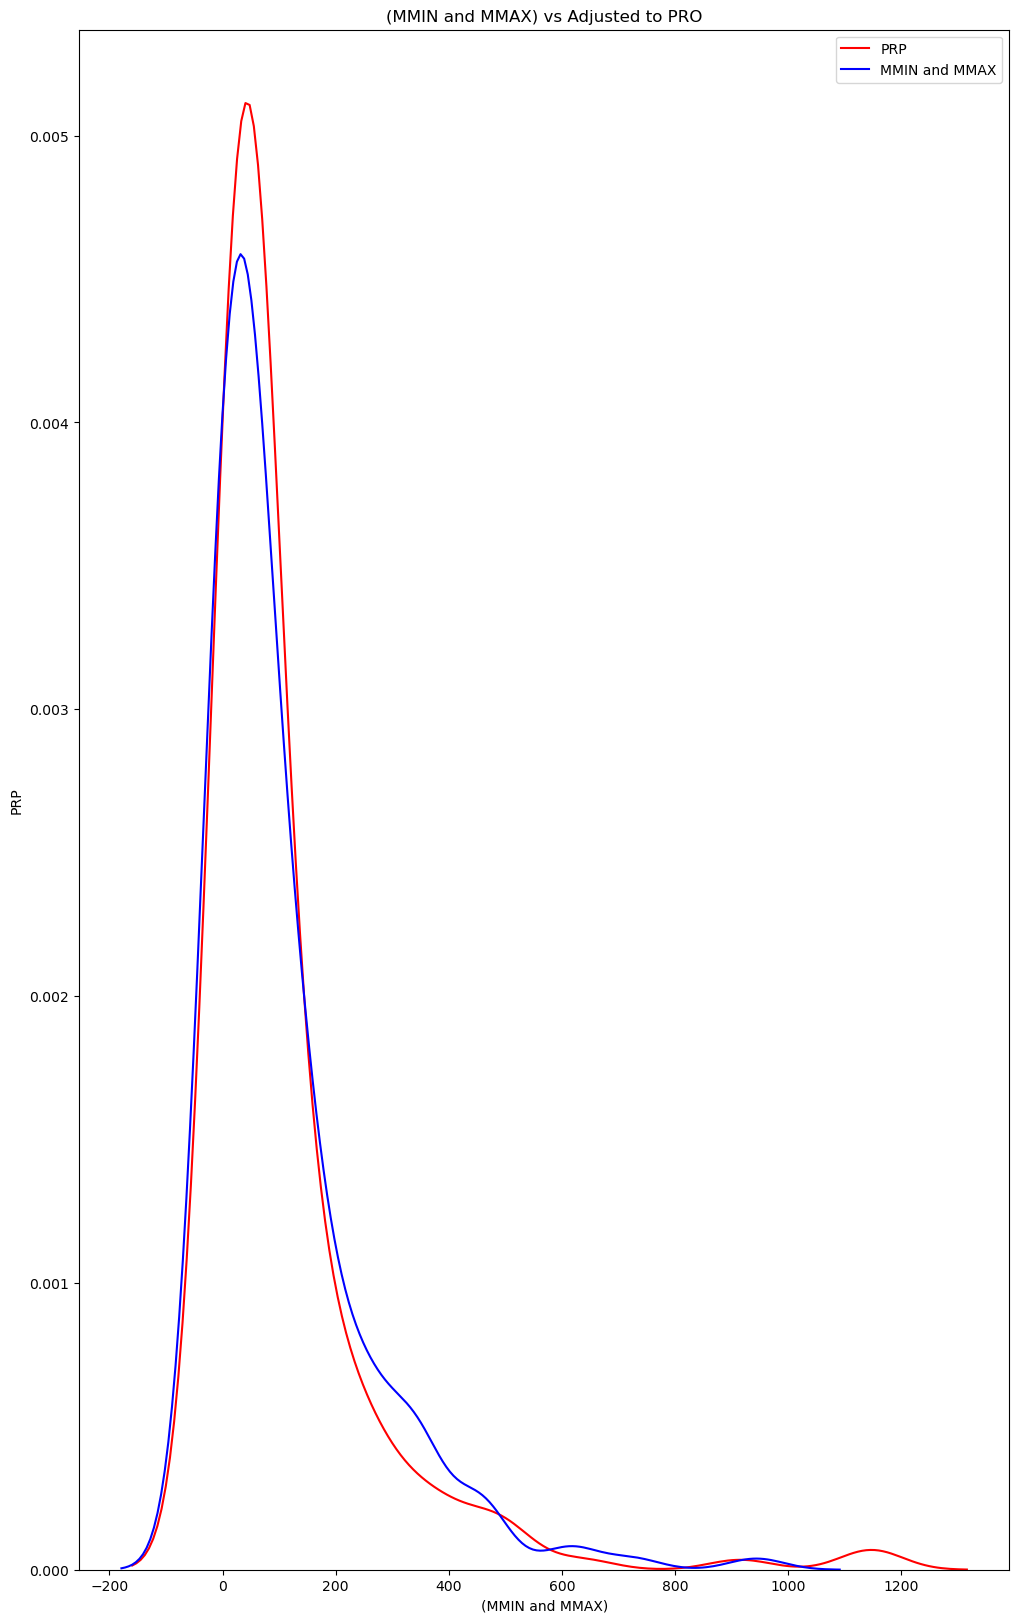

In [422]:
plt.figure(figsize=(ancho, alto))

ax1 = sns.kdeplot(df['PRP'], color="r", label="PRP")
sns.kdeplot(Y_hat, color="b", label="MMIN and MMAX" , ax=ax1)

plt.title('(MMIN and MMAX) vs Adjusted to PRO')
plt.xlabel('(MMIN and MMAX)')
plt.ylabel('PRP')

plt.legend(loc='upper right')

plt.show()
plt.close()

Podemos ver del grafico que no se supormone tanto los valores ajustados con la distribucion de los valores reales. Por lo que se puede buscar un mejor modelo.


## Polinomial Regresion (MMIN vs PRP)

In [423]:
def GraficaPolinomial(modelo, variable_independiente, variable_dependiente, Nombre):
    nuevo_x = np.linspace(0, 40000, 100)
    nuevo_y = modelo(nuevo_x)

    plt.plot(variable_independiente, variable_dependiente, '.', nuevo_x, nuevo_y, '-')
    plt.title('Ajuste Polinomial con Matplotlib para Variable Independiente ~ ' + Nombre)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    figura = plt.gcf()
    plt.xlabel(Nombre)
    plt.ylabel('Variable Dependiente')

    plt.show()
    plt.close()



In [424]:
x = df['MMIN']
y = df['PRP']

In [425]:
# En este caso se usará un polinomio de tercer orden o cúbico
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
1.389e-11 x - 4.693e-07 x + 0.03584 x + 8.792


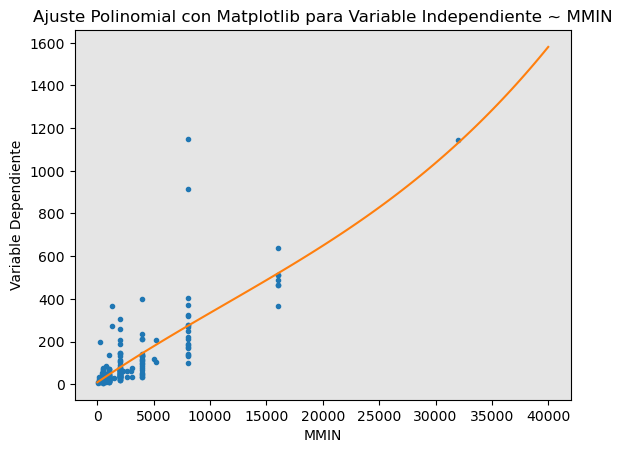

In [426]:
GraficaPolinomial(p, x, y, 'MMIN')

In [427]:
np.polyfit(x, y, 3)

array([ 1.38932850e-11, -4.69339761e-07,  3.58406392e-02,  8.79224605e+00])

## Polinomial Regresion (MMAX vs PRP)

In [428]:
x = df['MMAX']
y = df['PRP']

In [429]:
# En este caso se usará un polinomio de tercer orden o cúbico
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3             2
-1.489e-12 x + 3.257e-07 x - 0.0002326 x + 33.2


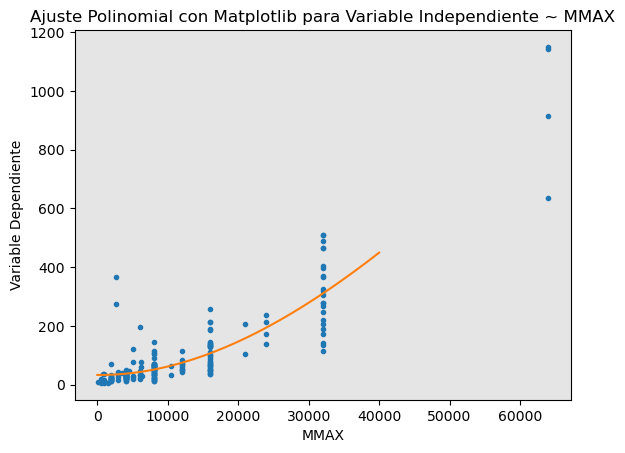

In [430]:
GraficaPolinomial(p, x, y, 'MMAX')

In [431]:
np.polyfit(x, y, 3)

array([-1.48883245e-12,  3.25659016e-07, -2.32591371e-04,  3.32027505e+01])

## Polinomial Features ((MMAX and MMIN) vs PRP)

In [432]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Entrada=[('normalizar',StandardScaler()), ('polinomio', PolynomialFeatures(include_bias=False)), ('modelo',LinearRegression())]
tuberia=Pipeline(Entrada)

Z = df[['MMIN', 'MMAX']]
y = df["PRP"]

Z = Z.astype(float)
tuberia.fit(Z,y)

y_tubo=tuberia.predict(Z)
y_tubo



array([  22.41072647,  266.17700489,  266.17700489,  266.17700489,
        194.99390138,  266.17700489,  440.51530763,  440.51530763,
        806.70920681, 1146.61805626,   36.94738069,   26.19885456,
         54.70913747,  106.72878051,   22.42900111,   71.72233417,
         28.33210149,   25.89662113,   38.96812221,  138.48004848,
         44.56575766,   80.01292173,   61.26169671,   80.01292173,
         20.41074367,   28.07337462,   22.41072647,   21.55255935,
         25.89662113,   21.42587671,   44.71634361,   44.71634361,
         68.85989816,   68.85989816,  148.31342523,  148.31342523,
         27.81511043,   35.62543323,   54.70913747,   35.62543323,
         37.32558398,   81.87511174,   81.87511174,   81.87511174,
         50.20643966,   37.32558398,   31.48636802,   35.00227983,
         30.00901417,   30.00901417,   28.21658906,   22.66409176,
         74.26800027,   37.32558398,   35.62543323,   50.20643966,
         37.32558398,   26.47680818,   26.47680818,   26.47680

## Gráfica de distribución real y la realizada por el modelo

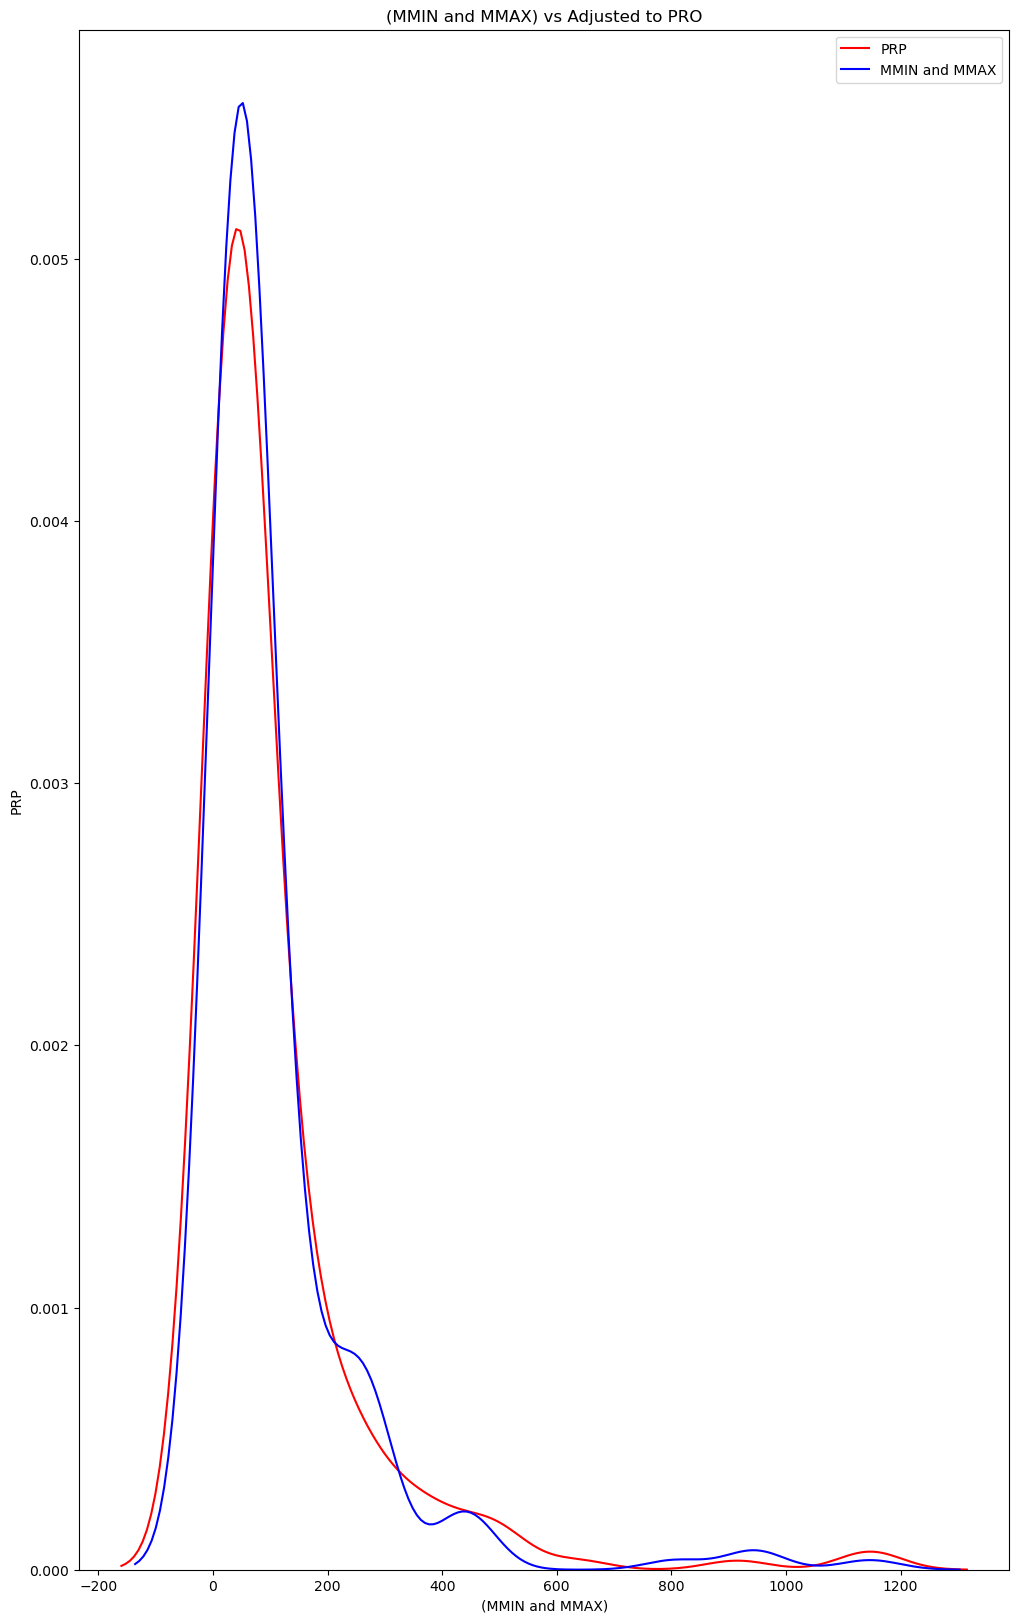

In [433]:
plt.figure(figsize=(ancho, alto))

ax1 = sns.kdeplot(df['PRP'], color="r", label="PRP")
sns.kdeplot(y_tubo, color="b", label="MMIN and MMAX" , ax=ax1)

plt.title('(MMIN and MMAX) vs Adjusted to PRO')
plt.xlabel('(MMIN and MMAX)')
plt.ylabel('PRP')

plt.legend(loc='upper right')

plt.show()
plt.close()

podemos visualizar que la distribucio ajustada no se superpone tanto a la distribucion real, por lo que se podria mejorar el modelo.

## Evaluacion de los modelos

# Modelo 1: Regresión Lineal Simple

In [434]:
X = df[['MMAX']]
Y = df["PRP"]

lm = LinearRegression()
# ajustar el modelo
lm.fit(X, Y)
# encontrar el R^2
print('El valor de R-cuadrado es: ', lm.score(X, Y))

## Calcular el MSE utilizando las mismas variables de estudio.
Y_hat=lm.predict(X)
mse = mean_squared_error(df['PRP'], Y_hat)
print('El error cuadrático medio del precio y el precio pronosticado es: ', mse)

El valor de R-cuadrado es:  0.7447761186712318
El error cuadrático medio del precio y el precio pronosticado es:  6570.167488145874


## Modelo 2: Regresión Lineal Multiple


In [435]:
# ajustar el modelo
lm.fit(Z, df['PRP'])
# encontrar el R^2
print('El valor de R-cuadrado es: ', lm.score(Z, df['PRP']))

Y_hat_multi = lm.predict(Z)
mse = mean_squared_error(df['PRP'], Y_hat_multi)
print('El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ',mse )

El valor de R-cuadrado es:  0.7912937224880761
El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es:  5372.675910818972


## Modelo 3: Regresión Polinomial

In [436]:
r_cuadrado = r2_score(y, p(x))
print('El valor de R-cuadrado es: ', r_cuadrado)
mse = mean_squared_error(df['PRP'], p(x))
print('El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ',mse )

El valor de R-cuadrado es:  0.8330468349082033
El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es:  4297.835498850445


## Modelo 3: Regresión Polinomial Multiple con pipeline


In [437]:
r2 = r2_score(y, tuberia.predict(Z))
print('El valor de R-cuadrado es: ', r2)
mse = mean_squared_error(df['PRP'], tuberia.predict(Z))
print('El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ',mse )

El valor de R-cuadrado es:  0.8890718665845729
El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es:  2855.5964743280333


### Veamos los valores de los diferentes modelos generados hasta el momento sin realizas un refinamiento de los modelos

**Regresión lineal simple**: uso de `MMAX` como variable predictiva del rendimiento relativo.

- R-cuadrado: $0.744776118671232$
- MSE: $6570.167488145871$

**Regresión Lineal Multiple**: uso de `MMAX` como variable predictiva del rendimiento relativo.

- R-cuadrado: $0.7912937224880761$
- MSE: $5372.675910818972$

**Regresión Polinomial**: uso de `MMAX` y `MMIN` como variable predictiva del rendimiento relativo.

- R-cuadrado: $0.8330468349082033$
- MSE: $4297.835498850445$

**Regresión Polinomial Multiple**: uso de `MMAX` y `MMIN` como variable predictiva del rendimiento relativo.

- R-cuadrado: $ 0.8890718665845729$
- MSE: $2855.5964743280333$


Podemos visualizar que al aumentar las variables independientes en este caso, el modelo puede predecir mejor. Sin embargo, al utilizar un modelo no lineal, este mejora drásticamente, ya que se puede adaptar a relaciones más complejas y que no se pueden separar con regresiones lineales.

De los 4 modelos que probamos, el que obtuvo mayor $R^2$ fue el polinomial múltiple, el cual lo utilizamos con una normalización `StandardScaler`. Además, el menor $MSE$ también lo obtuvimos del polinomio múltiple. Por lo que el modelo polinomial multiple es el que mejor predice el rendimiento relativo de las CPU.






## Dividiremos aleatoriamente las variables de entrenamiento, usaremos el $80$% en entrenamiento y el $20$% en evaluar el modelo

In [438]:
x_datos = df[['MMIN', 'MMAX']].astype(float)
y_datos = df["PRP"]

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(x_datos, y_datos, test_size=0.3, random_state=2)

print("número de muestras de prueba:", x_prueba.shape[0])
print("número de muestras de entrenamiento:",x_entrena.shape[0])

número de muestras de prueba: 63
número de muestras de entrenamiento: 146


In [439]:
Entrada=[('normalizar',StandardScaler()), ('polinomio', PolynomialFeatures(include_bias=False)), ('modelo',LinearRegression())]
tuberia=Pipeline(Entrada)

tuberia.fit(x_entrena,y_entrena)

y_tubo=tuberia.predict(x_prueba)
y_tubo


array([ 259.65742403,  154.12064739,  144.5083406 ,   40.47192316,
        104.53198085,   78.62417732,   62.22868881,   20.61765699,
         55.5979316 ,   22.38967651,   78.62417732,   22.91978222,
         77.66938553,   34.7299721 ,   31.6996824 ,   62.22868881,
         97.88152765,   78.62417732,   38.28807506,   37.11263269,
        446.92172506,   84.26112094,   57.4013202 ,   27.14478334,
         55.5979316 ,   38.28807506,  446.92172506,   55.5979316 ,
        259.65742403,   43.41176626,   62.22868881,  259.65742403,
         78.62417732,  259.65742403,   38.28807506,  259.65742403,
         47.10760436,   27.06821481,   37.11263269,   48.03311037,
         31.6996824 ,   37.11263269,   41.11666178,   55.5979316 ,
         55.5979316 ,  269.82770929,   27.90708802,   62.22868881,
        269.82770929,   38.28807506, 1163.72775637,   78.62417732,
         27.90708802,   37.11263269,   28.57830467,   55.5979316 ,
         55.5979316 ,   38.28807506,   26.32925362,   29.39383

In [440]:
r2 = r2_score(y, tuberia.predict(Z))
print('El valor de R-cuadrado es: ', r2)
mse = mean_squared_error(df['PRP'], tuberia.predict(Z))
print('El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ',mse )

El valor de R-cuadrado es:  0.8884693627442418
El error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es:  2871.1065869500067


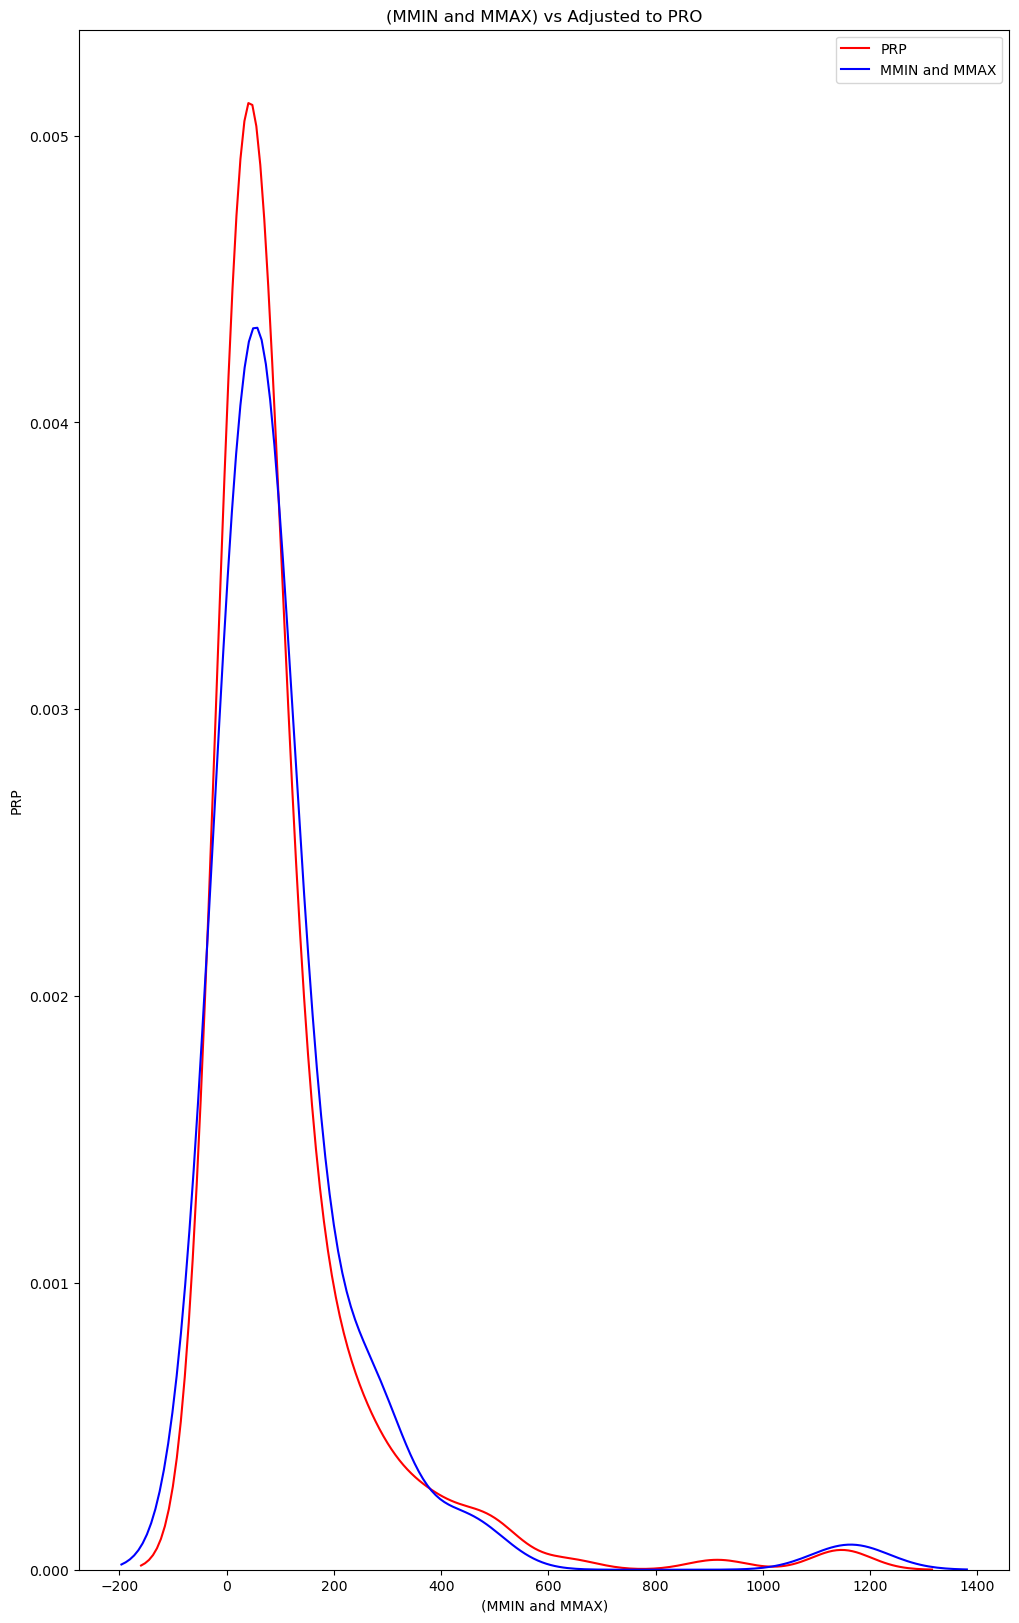

In [441]:
## Graficamos la distribucion del modelo
plt.figure(figsize=(ancho, alto))

ax1 = sns.kdeplot(df['PRP'], color="r", label="PRP")
sns.kdeplot(y_tubo, color="b", label="MMIN and MMAX" , ax=ax1)

plt.title('(MMIN and MMAX) vs Adjusted to PRO')
plt.xlabel('(MMIN and MMAX)')
plt.ylabel('PRP')

plt.legend(loc='upper right')

plt.show()

## Visualizar en que orden se obtiene un mayor $R^2$

r_cruce [0.4537232  0.76067881 0.90036644 0.63467688]
El promedio de cada iteración es  0.6873613317667593 y la desviación estándar es  0.16439970790745423


,0
0,-1.906441e-05
1,8.625343e-01
2,9.315336e-01
3,6.740110e-01
4,-1.499536e+01
5,-4.537949e+02
6,-4.631318e+04
7,-1.460093e+07
8,-1.406260e+05
9,-7.711219e+07


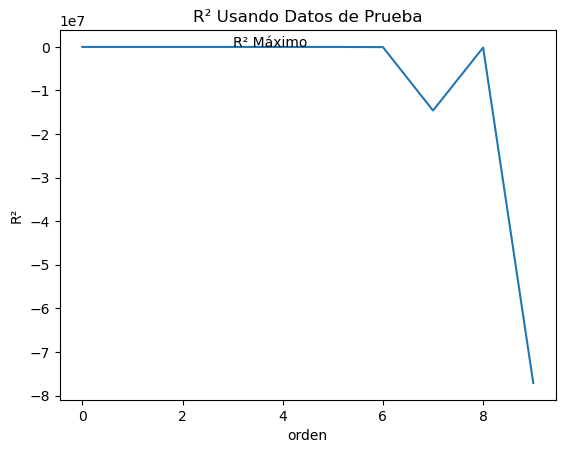

In [446]:
from sklearn.model_selection import cross_val_score
reg_pol = LinearRegression()
Rcuad_prueba = []

orden = np.arange(10)

for n in orden:
    poliN = PolynomialFeatures(degree=n)



    x_entrena_poliN = poliN.fit_transform(x_entrena)

    x_prueba_poliN = poliN.transform(x_prueba)

    reg_pol.fit(x_entrena_poliN, y_entrena)

    Rcuad_prueba.append(reg_pol.score(x_prueba_poliN, y_prueba))



plt.plot(orden, Rcuad_prueba)
plt.xlabel('orden')
plt.ylabel('R²')
plt.title('R² Usando Datos de Prueba')
plt.text(3, 0.74, 'R² Máximo ')
df = pd.DataFrame(Rcuad_prueba)
df.idxmax().values
df

## Cross Validation (Regresion Polinomial)

In [456]:
R_cruce = cross_val_score(tuberia, x_datos, y_datos, cv=5)
print("r_cruce", R_cruce)
print("El promedio de cada iteración es ", R_cruce.mean(), "y la desviación estándar es " , R_cruce.std())
print("Podemos ver que la validación cruzada logró encontrar en ciertos casos un resultado mejor, esto se puede deber a que esta validación utiliza todos los datos para prueba y evaluación.  Esto nos permite probar el modelo con datos más variados entre si y ver cómo realmente podría llegar a ser su comportamiento en un caso de uso real.")

r_cruce [0.41716317 0.26429973 0.79866376 0.87868975 0.63365193]
El promedio de cada iteración es  0.5984936680324635 y la desviación estándar es  0.22994797323256513
Podemos ver que la validación cruzada logró encontrar en ciertos casos un resultado mejor, esto se puede deber a que esta validación utiliza todos los datos para prueba y evaluación.  Esto nos permite probar el modelo con datos más variados entre si y ver cómo realmente podría llegar a ser su comportamiento en un caso de uso real.
